In [63]:
import numpy as np
import matplotlib.pyplot as plt

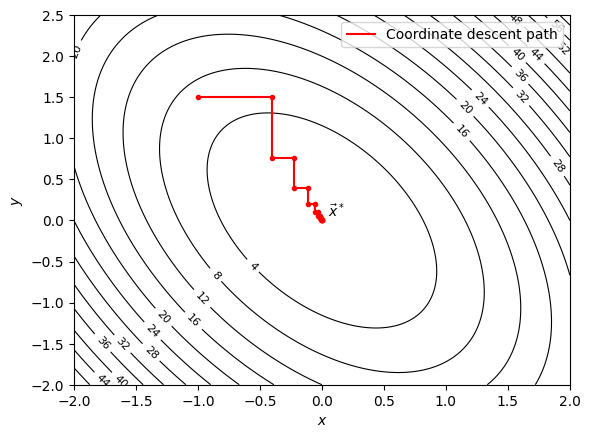

In [74]:
def f(x, y):
    return 6*x**2 + 4*x*y + 3*y**2

# Define coordinate descent steps for this function
def coordinate_descent(x0, y0, steps=10):
    x_vals = [x0]
    y_vals = [y0]
    x, y = x0, y0

    for i in range(steps):
        # Minimize over x (keeping y fixed)
        x = x - 0.1 * (12*x + 4*y)  # gradient wrt x
        x_vals.append(x)
        y_vals.append(y)

        # Minimize over y (keeping x fixed)
        y = y - 0.1 * (4*x + 6*y)   # gradient wrt y
        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

# Set up a grid for the contour plot
xgrid = np.linspace(-2, 2, 400)
ygrid = np.linspace(-2, 2.5, 400)
X, Y = np.meshgrid(xgrid, ygrid)
Z = f(X, Y)

# Compute the coordinate descent path
x_path, y_path = coordinate_descent(x0=-1.0, y0=1.5)

# Plot the contour lines and path
contours = plt.contour(X, Y, Z, levels=15, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)

# Plot the coordinate descent path with small red dots
plt.plot(x_path, y_path, 'r-', linewidth=1.5, label='Coordinate descent path')
plt.plot(x_path, y_path, 'ro', markersize=3)

# MArk the optimal point
plt.text(0.05, 0.05, r'$\vec{x}^*$', color='black')

# Axis labels and title
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper right')

plt.savefig('figures/coordinate_descent.pdf')